In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [3]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [4]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [5]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,400,200)

Vizualize data

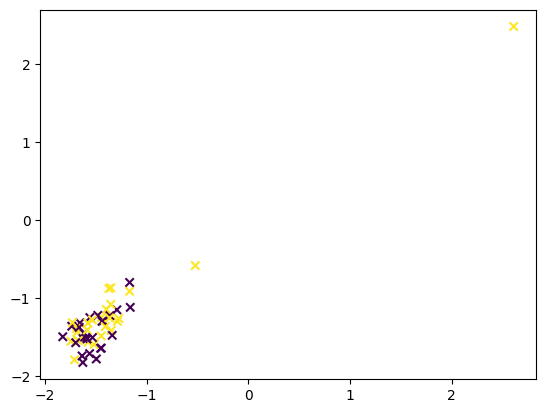

In [6]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(4,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_16712\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

Epoch 1/15
2/2 [==============================] - 1s 8ms/step - loss: 0.1939 - accuracy: 0.7500
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1910 - accuracy: 0.7500
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1885 - accuracy: 0.7750
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1859 - accuracy: 0.7750
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1836 - accuracy: 0.8000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1810 - accuracy: 0.8000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1788 - accuracy: 0.8000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1767 - accuracy: 0.8250
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1746 - accuracy: 0.8250
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1724 - accuracy: 0.8500
Epoch 11/15
2/2 [======================

1/1 [==============================] - 0s 109ms/step - loss: 0.2147 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3993 - accuracy: 0.4000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3951 - accuracy: 0.4750
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3909 - accuracy: 0.5500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.5500
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3831 - accuracy: 0.5500
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3789 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3712 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.5750
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.1959 - accuracy: 0.6750
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.1840 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2837 - accuracy: 0.4750
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2809 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2784 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2758 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2733 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2689 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2666 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2060 - accuracy: 0.6750
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.7000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 0.7000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.7000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1925 - accuracy: 0.7000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1895 - accuracy: 0.7000
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1859 - accuracy: 0.7000
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1831 - accuracy: 0.7000
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1798 - accuracy: 0.7500
Epoch 12/15
2/2 [==============================] - 0s 7ms/step - loss: 0.1767 - accuracy: 0.7500
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.2380 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2352 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2326 - accuracy: 0.5750
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.6000
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2272 - accuracy: 0.6250
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2248 - accuracy: 0.6250
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 200ms/step - loss: 0.3723 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3438 - accuracy: 0.3500
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3397 - accuracy: 0.3500
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 0.3107 - accuracy: 0.5750
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.5750
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2131 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2505 - accuracy: 0.6250
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2485 - accuracy: 0.6250
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.6250
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2449 - accuracy: 0.6250
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2432 - accuracy: 0.6250
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.6250
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.6250
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.6000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.6000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2453 - accuracy: 0.6000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2424 - accuracy: 0.6000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2399 - accuracy: 0.6000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.6000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2347 - accuracy: 0.6000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2324 - accuracy: 0.6250
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.6250
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.6250
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.5250
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2511 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.5500
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.5500
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.5500
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2445 - accuracy: 0.5500
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.5500
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.3292 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.3739 - accuracy: 0.3500
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2071 - accuracy: 0.6750
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2044 - accuracy: 0.6750
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2015 - accuracy: 0.7000
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2384 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3510 - accuracy: 0.4000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3462 - accuracy: 0.4250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3416 - accuracy: 0.4250
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.4250
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.4750
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3284 - accuracy: 0.4750
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 5ms/step - loss: 0.3029 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2919 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.5250
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2851 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2715 - accuracy: 0.5500
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.4750
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3124 - accuracy: 0.5250
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.5250
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.5250
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.5250
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.5250
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.5250
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.3443 - accuracy: 0.4000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3160 - accuracy: 0.4000
Epoch 12/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.4250
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3095 - accuracy: 0.4250
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3062 - accuracy: 0.4250
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2467 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2641 - accuracy: 0.4750
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2616 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2573 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.5250
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 109ms/step - loss: 0.3112 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.5500
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.6000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2465 - accuracy: 0.6000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.6000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.6000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.6500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.6500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.6500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 0.6500
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2222 - accuracy: 0.6250
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2196 - accuracy: 0.6500
Epoch 7/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2169 - accuracy: 0.7000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2147 - accuracy: 0.7250
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.7250
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2099 - accuracy: 0.7500
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2076 - accuracy: 0.7500
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2054 - accuracy: 0.7750
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2031 - accuracy: 0.7750
Epoch 14/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2010 - accuracy: 0.7750
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 0.3319 - accuracy: 0.4000
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.4000
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3273 - accuracy: 0.4000
Epoch 13/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3254 - accuracy: 0.4000
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3232 - accuracy: 0.4000
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2283 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.1782 - accuracy: 0.7500
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1751 - accuracy: 0.7500
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.7500
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1692 - accuracy: 0.7750
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 161ms/step - loss: 0.1981 - accuracy: 0.8000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3510 - accuracy: 0.4500
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3484 - accuracy: 0.4500
Epoch 3/15
2/2 [==============================] - 0s 9ms/step - loss: 0.3464 - accuracy: 0.4500
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3442 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3421 - accuracy: 0.4500
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.4500
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3377 - accuracy: 0.4500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3355 - accuracy: 0.4500
Epoch 9/15
2/2 [==============================] - 0s 10ms/step - loss: 0.3332 - accuracy: 0.4500
Epoch 10/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3061 - accuracy: 0.4500
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.4500
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.4500
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.4500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2930 - accuracy: 0.4500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2897 - accuracy: 0.4750
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.4750
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.4750
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.4750
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.4750
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2502 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.5250
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2412 - accuracy: 0.5750
Epoch 15/15
1/1 [==============================] - 0s 151ms/step - loss: 0.1762 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3374 - accuracy: 0.3250
Epoch 2/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.3750
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3321 - accuracy: 0.3750
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2682 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2618 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2033 - accuracy: 0.7000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1990 - accuracy: 0.7250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1959 - accuracy: 0.7250
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.7250
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1890 - accuracy: 0.7250
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1856 - accuracy: 0.7500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.7500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1793 - accuracy: 0.7750
Epoch 9/15
2/2 [==============================] 

In [12]:
dwt_test_classifiers(1,'db3',time_config)

Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2819 - accuracy: 0.4750
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.4750
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2764 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2749 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2732 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2719 - accuracy: 0.5250
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2688 - accuracy: 0.5250
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.5250
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.2639 - accuracy: 0.6500
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2627 - accuracy: 0.6500
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2617 - accuracy: 0.6500
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2605 - accuracy: 0.6500
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.6750
Epoch 11/15
2/2 [==============================] - 0s 16ms/step - loss: 0.2583 - accuracy: 0.6750
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2573 - accuracy: 0.6750
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2562 - accuracy: 0.6750
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2551 - accuracy: 0.6750
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2437 - accuracy: 0.7000
Epoch 1/15
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2977 - accuracy: 0.4000
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2966 - accuracy: 0.4000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.4250
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2946 - accuracy: 0.4250
Epoch 15/15
1/1 [==============================] - 0s 131ms/step - loss: 0.2978 - accuracy: 0.3000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3032 - accuracy: 0.4750
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.4750
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.4750
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2991 - accuracy: 0.4750
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2979 - accuracy: 0.4750
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 206ms/step - loss: 0.2243 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2410 - accuracy: 0.6000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2401 - accuracy: 0.6000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.6000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.6000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2381 - accuracy: 0.6250
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2375 - accuracy: 0.6000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2369 - accuracy: 0.6250
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.6250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.6250
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2872 - accuracy: 0.5500
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2861 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2850 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2839 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2817 - accuracy: 0.5500
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2808 - accuracy: 0.5500
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2797 - accuracy: 0.5500
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2786 - accuracy: 0.5500
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2776 - accuracy: 0.5500
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 15ms/step - loss: 0.2665 - accuracy: 0.6000
Epoch 11/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2652 - accuracy: 0.6000
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2639 - accuracy: 0.6000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.6000
Epoch 14/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2616 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2546 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3081 - accuracy: 0.3750
Epoch 2/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3065 - accuracy: 0.3750
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3051 - accuracy: 0.3500
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.3500
Epoch 5/15
2/2 [===========================

1/1 [==============================] - 0s 156ms/step - loss: 0.2530 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2482 - accuracy: 0.6000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.5750
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.5750
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2440 - accuracy: 0.5750
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.6000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.6000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2401 - accuracy: 0.6000
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2387 - accuracy: 0.6000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.6250
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 7ms/step - loss: 0.3274 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3259 - accuracy: 0.4250
Epoch 6/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3242 - accuracy: 0.4250
Epoch 7/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3228 - accuracy: 0.4250
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3213 - accuracy: 0.4250
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3197 - accuracy: 0.4250
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3183 - accuracy: 0.4250
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3168 - accuracy: 0.4250
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3152 - accuracy: 0.4250
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3137 - accuracy: 0.4250
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2988 - accuracy: 0.5750
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.5750
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2951 - accuracy: 0.5750
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2932 - accuracy: 0.5750
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2913 - accuracy: 0.5750
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2896 - accuracy: 0.5750
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.3368 - accuracy: 0.3000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3131 - accuracy: 0.4000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.4000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3099 - accuracy: 0.4000
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3110 - accuracy: 0.3750
Epoch 15/15
1/1 [==============================] - 0s 166ms/step - loss: 0.2988 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2627 - accuracy: 0.5500
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2615 - accuracy: 0.5500
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.5500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.5500
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2584 - accuracy: 0.5500
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2566 - accuracy: 0.6000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2556 - accuracy: 0.6250
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2582 - accuracy: 0.5500
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2575 - accuracy: 0.5500
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2568 - accuracy: 0.5500
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2562 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2550 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2543 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2537 - accuracy: 0.5500
Epoch 11/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2531 - accuracy: 0.5500
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.5500
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2567 - accuracy: 0.5000
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2560 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2547 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2540 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2221 - accuracy: 0.8000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3388 - accuracy: 0.4750
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3363 - accuracy: 0.4750
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3521 - accuracy: 0.3500
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3513 - accuracy: 0.3500
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2219 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2911 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2890 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2872 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2838 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.4750
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.4750
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.4750
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.4076 - accuracy: 0.4750
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.4750
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.4750
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4030 - accuracy: 0.4750
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4014 - accuracy: 0.4750
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3998 - accuracy: 0.4750
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.4750
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5250
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2478 - accuracy: 0.5250
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.5250
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2460 - accuracy: 0.5250
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2451 - accuracy: 0.5250
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.5250
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2434 - accuracy: 0.5250
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2157 - accuracy: 0.8000
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2771 - accuracy: 0.5250
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2550 - accuracy: 0.5250
Epoch 13/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2540 - accuracy: 0.5250
Epoch 14/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2528 - accuracy: 0.5250
Epoch 15/15
1/1 [==============================] - 0s 158ms/step - loss: 0.2251 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 7ms/step - loss: 0.3201 - accuracy: 0.4500
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3175 - accuracy: 0.4500
Epoch 3/15
2/2 [==============================] - 0s 12ms/step - loss: 0.3154 - accuracy: 0.4500
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3109 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3089 - accuracy: 0.5000
Epoch 7/15
2/2 [=============================

2/2 [==============================] - 1s 5ms/step - loss: 0.2911 - accuracy: 0.4500
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2894 - accuracy: 0.4500
Epoch 3/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2877 - accuracy: 0.4500
Epoch 4/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2862 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2847 - accuracy: 0.4500
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.4750
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.4750
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2799 - accuracy: 0.4750
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.4750
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2768 - accuracy: 0.4750
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 4ms/step - loss: 0.2523 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2515 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2497 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.5500
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2479 - accuracy: 0.5500
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2471 - accuracy: 0.5500
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 0.5750
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2454 - accuracy: 0.5750
Epoch 15/15
1/1 [==============================] - 0s 144ms/step - loss: 0.2101 - accuracy: 0.6000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2652 - accuracy: 0.6250
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2647 - accuracy: 0.6250
Epoch 13/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2642 - accuracy: 0.6250
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 151ms/step - loss: 0.3992 - accuracy: 0.1000
Epoch 1/15
2/2 [==============================] - 1s 7ms/step - loss: 0.2662 - accuracy: 0.5250
Epoch 2/15
2/2 [==============================] - 0s 10ms/step - loss: 0.2655 - accuracy: 0.5250
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2649 - accuracy: 0.5250
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.5250
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2638 - accuracy: 0.5250
Epoch 6/15
2/2 [============================

left vs right

In [13]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (1,0.2,1000,0)

In [14]:
csp_test_classifiers(2,time_config, 7, 2)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2557 - accuracy: 0.3750
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2556 - accuracy: 0.3250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.3250
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.3500
Epoch 5/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.3500
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2552 - accuracy: 0.3500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.4000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2550 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2549 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2548 - accuracy: 0.5000
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 5ms/step - loss: 0.2723 - accuracy: 0.4000
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2721 - accuracy: 0.4000
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2718 - accuracy: 0.4000
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2716 - accuracy: 0.4000
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2713 - accuracy: 0.4000
Epoch 11/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2711 - accuracy: 0.4000
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2709 - accuracy: 0.4000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2706 - accuracy: 0.4250
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2704 - accuracy: 0.4250
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2438 - accuracy: 0.5455
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2728 - accuracy: 0.3500
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2724 - accuracy: 0.3500
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2721 - accuracy: 0.3500
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2718 - accuracy: 0.3500
Epoch 15/15
1/1 [==============================] - 0s 149ms/step - loss: 0.2427 - accuracy: 0.6364
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2546 - accuracy: 0.4500
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.4500
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2544 - accuracy: 0.4500
Epoch 4/15
2/2 [==============================] - 0s 8ms/step - loss: 0.2542 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2542 - accuracy: 0.4500
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 140ms/step - loss: 0.2538 - accuracy: 0.3636
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2448 - accuracy: 0.4750
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.6250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2445 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2444 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.2750
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.2750
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2583 - accuracy: 0.2750
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.2500
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2579 - accuracy: 0.2500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.2500
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2575 - accuracy: 0.2500
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2573 - accuracy: 0.2500
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2571 - accuracy: 0.2750
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2570 - accuracy: 0.3000
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.3000
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.3000
Epoch 12/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2939 - accuracy: 0.3000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2934 - accuracy: 0.2750
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.2750
Epoch 15/15
1/1 [==============================] - 0s 154ms/step - loss: 0.2327 - accuracy: 0.5455
Epoch 1/15
2/2 [==============================] - 1s 7ms/step - loss: 0.3235 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3233 - accuracy: 0.3250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3229 - accuracy: 0.3500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3226 - accuracy: 0.5000
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 136ms/step - loss: 0.3040 - accuracy: 0.5455
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2300 - accuracy: 0.5750
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.7750
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2296 - accuracy: 0.7750
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2294 - accuracy: 0.7750
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2292 - accuracy: 0.7750
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2290 - accuracy: 0.7750
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.7750
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.7750
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.7750
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2565 - accuracy: 0.4000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2563 - accuracy: 0.4000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2560 - accuracy: 0.4000
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2558 - accuracy: 0.4000
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2556 - accuracy: 0.4250
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.4250
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.4250
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2550 - accuracy: 0.4250
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2548 - accuracy: 0.4250
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2546 - accuracy: 0.4250
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2740 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2738 - accuracy: 0.5000
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2736 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2734 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2732 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2730 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 134ms/step - loss: 0.2822 - accuracy: 0.2727
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2726 - accuracy: 0.3750
Epoch 2/15
2/2 [==============================] - 0s 13ms/step - loss: 0.2723 - accuracy: 0.4750
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.3000
Epoch 4/15
2/2 [==========================

2/2 [==============================] - 0s 6ms/step - loss: 0.4524 - accuracy: 0.1000
Epoch 15/15
1/1 [==============================] - 0s 129ms/step - loss: 0.2660 - accuracy: 0.6364
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3351 - accuracy: 0.3750
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.3250
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.5250
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3337 - accuracy: 0.5250
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.5250
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.5250
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3324 - accuracy: 0.5250
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3320 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.2822 - accuracy: 0.3250
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2819 - accuracy: 0.3250
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2817 - accuracy: 0.3250
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2814 - accuracy: 0.3250
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.3500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2810 - accuracy: 0.3500
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.3250
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.3500
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.3500
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2802 - accuracy: 0.3500
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.2568 - accuracy: 0.4250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.4500
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2561 - accuracy: 0.4500
Epoch 11/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2557 - accuracy: 0.4500
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.4750
Epoch 13/15
2/2 [==============================] - 0s 26ms/step - loss: 0.2550 - accuracy: 0.4750
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2547 - accuracy: 0.4750
Epoch 15/15
1/1 [==============================] - 0s 182ms/step - loss: 0.2504 - accuracy: 0.3636
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.1920 - accuracy: 0.8250
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1917 - accuracy: 0.8250
Epoch 3/15
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2749 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2475 - accuracy: 0.4545
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2601 - accuracy: 0.3250
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.5500
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.5500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2596 - accuracy: 0.5500
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2594 - accuracy: 0.5500
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2592 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2591 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.7000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2467 - accuracy: 0.7000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2466 - accuracy: 0.6750
Epoch 5/15
2/2 [==============================] - 0s 12ms/step - loss: 0.2466 - accuracy: 0.6750
Epoch 6/15
2/2 [==============================] - 0s 9ms/step - loss: 0.2465 - accuracy: 0.6750
Epoch 7/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2464 - accuracy: 0.6750
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2463 - accuracy: 0.6750
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2462 - accuracy: 0.6750
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.6750
Epoch 11/15
2/2 [==============================] - 0s 13ms/step - loss: 0.2460 - accuracy: 0.6750
Epoch 12/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2060 - accuracy: 0.8250
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2057 - accuracy: 0.8250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.8250
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2052 - accuracy: 0.8250
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2049 - accuracy: 0.8250
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2046 - accuracy: 0.8250
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2043 - accuracy: 0.8250
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.8250
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2234 - accuracy: 0.6364
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2737 - accuracy: 0.4500
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.2250
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.2250
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3321 - accuracy: 0.2500
Epoch 15/15
1/1 [==============================] - 0s 129ms/step - loss: 0.2422 - accuracy: 0.3636
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3828 - accuracy: 0.2750
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3822 - accuracy: 0.5500
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3817 - accuracy: 0.5500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3811 - accuracy: 0.5500
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.5500
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 4ms/step - loss: 0.2142 - accuracy: 0.6250
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2139 - accuracy: 0.8500
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 0.8500
Epoch 4/15
2/2 [==============================] - 0s 10ms/step - loss: 0.2133 - accuracy: 0.8500
Epoch 5/15
2/2 [==============================] - 0s 12ms/step - loss: 0.2130 - accuracy: 0.8500
Epoch 6/15
2/2 [==============================] - 0s 12ms/step - loss: 0.2127 - accuracy: 0.8500
Epoch 7/15
2/2 [==============================] - 0s 10ms/step - loss: 0.2124 - accuracy: 0.8500
Epoch 8/15
2/2 [==============================] - 0s 13ms/step - loss: 0.2121 - accuracy: 0.8500
Epoch 9/15
2/2 [==============================] - 0s 15ms/step - loss: 0.2118 - accuracy: 0.8500
Epoch 10/15
2/2 [==============================] - 0s 12ms/step - loss: 0.2116 - accuracy: 0.8500
Epoch 11/15
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1998 - accuracy: 0.8000
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1996 - accuracy: 0.8000
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1993 - accuracy: 0.8000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1990 - accuracy: 0.8000
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1988 - accuracy: 0.8000
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1985 - accuracy: 0.8000
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1983 - accuracy: 0.8000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.8000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.8000
Epoch 15/15
1/1 [==============================] - 0s 142ms/step - loss: 0.2346 - accuracy: 0.5455
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2073 - accuracy: 0.7750
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2071 - accuracy: 0.7750
Epoch 13/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.7750
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.8000
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2523 - accuracy: 0.6364
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2201 - accuracy: 0.6750
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2199 - accuracy: 0.6750
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 0.6750
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2196 - accuracy: 0.6750
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.6750
Epoch 6/15
2/2 [=============================

In [15]:
dwt_test_classifiers(2,'db3',time_config)

Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2889 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2868 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2783 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2768 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.5000
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.5500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2862 - accuracy: 0.5500
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2846 - accuracy: 0.5500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2831 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.5500
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.5500
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2784 - accuracy: 0.5500
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.5500
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2753 - accuracy: 0.5500
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.3352 - accuracy: 0.4545
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 7ms/step - loss: 0.2570 - accuracy: 0.5750
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2556 - accuracy: 0.5750
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2540 - accuracy: 0.5750
Epoch 14/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2525 - accuracy: 0.5750
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.3196 - accuracy: 0.4545
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2764 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2707 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2690 - accuracy: 0.5000
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 116ms/step - loss: 0.2533 - accuracy: 0.5455
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2835 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2798 - accuracy: 0.5250
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.5250
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.5250
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2749 - accuracy: 0.5250
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2733 - accuracy: 0.5250
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2718 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2703 - accuracy: 0.5250
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2423 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2404 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2388 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2371 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.5000
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2306 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2291 - accuracy: 0.5000
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2772 - accuracy: 0.5250
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.5250
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2744 - accuracy: 0.5250
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2732 - accuracy: 0.5250
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.5250
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.3659 - accuracy: 0.3636
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3121 - accuracy: 0.3500
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.3500
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.4000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3057 - accuracy: 0.4000
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 115ms/step - loss: 0.3103 - accuracy: 0.4545
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2768 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2747 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.5500
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.5500
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2693 - accuracy: 0.5750
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2678 - accuracy: 0.5750
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2661 - accuracy: 0.6000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2645 - accuracy: 0.6000
Epoch 9/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.6000
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3705 - accuracy: 0.4500
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3688 - accuracy: 0.4750
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3667 - accuracy: 0.4750
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.4750
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.4750
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3611 - accuracy: 0.4750
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3591 - accuracy: 0.4250
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3574 - accuracy: 0.4250
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.4250
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.4250
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.4250
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.4250
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3086 - accuracy: 0.4250
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3070 - accuracy: 0.4250
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.4250
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.2189 - accuracy: 0.7273
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3261 - accuracy: 0.4750
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.4750
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.4750
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3777 - accuracy: 0.4500
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2818 - accuracy: 0.5455
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3261 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3231 - accuracy: 0.5250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3206 - accuracy: 0.5250
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3180 - accuracy: 0.5250
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.5250
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3134 - accuracy: 0.5250
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.5250
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.4500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3089 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3064 - accuracy: 0.4500
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3038 - accuracy: 0.4500
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.4500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.4500
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.4750
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2944 - accuracy: 0.4750
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2920 - accuracy: 0.4750
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2896 - accuracy: 0.4750
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2638 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.5500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2602 - accuracy: 0.5500
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2584 - accuracy: 0.5500
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.5750
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2550 - accuracy: 0.5750
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2532 - accuracy: 0.5750
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2381 - accuracy: 0.5455
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3277 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.5000
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3080 - accuracy: 0.4500
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3064 - accuracy: 0.4750
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2772 - accuracy: 0.4545
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3502 - accuracy: 0.5250
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3480 - accuracy: 0.5250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3460 - accuracy: 0.5250
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3442 - accuracy: 0.5250
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.5250
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.5250
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.5250
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.5250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.5250
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2423 - accuracy: 0.5250
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.5250
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2386 - accuracy: 0.5250
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2369 - accuracy: 0.5250
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2351 - accuracy: 0.5250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2333 - accuracy: 0.5250
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2318 - accuracy: 0.5250
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.5250
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 7ms/step - loss: 0.3222 - accuracy: 0.4250
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.4250
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.4750
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.4750
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.5000
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3130 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3112 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3094 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2610 - accuracy: 0.5455
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.3162 - accuracy: 0.5250
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.5000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3022 - accuracy: 0.3636
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2850 - accuracy: 0.4500
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2825 - accuracy: 0.4500
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2804 - accuracy: 0.4750
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2785 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2766 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2746 - accuracy: 0.5250
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 5ms/step - loss: 0.2809 - accuracy: 0.4000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2785 - accuracy: 0.4000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.4000
Epoch 4/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.4000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2736 - accuracy: 0.4000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2720 - accuracy: 0.4000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2705 - accuracy: 0.4000
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2688 - accuracy: 0.4000
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2674 - accuracy: 0.4000
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2659 - accuracy: 0.4000
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.2544 - accuracy: 0.6250
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.6250
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.6250
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.6250
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2479 - accuracy: 0.6250
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2464 - accuracy: 0.6250
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2450 - accuracy: 0.6250
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2435 - accuracy: 0.6250
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2191 - accuracy: 0.6364
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 0.6000
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2322 - accuracy: 0.6000
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2307 - accuracy: 0.6000
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2295 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2120 - accuracy: 0.8182
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2542 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.5250
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2508 - accuracy: 0.5250
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5250
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2481 - accuracy: 0.5500
Epoch 6/15
2/2 [=============================

In [7]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [8]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [9]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [10]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
